In [1]:
!pip install numpy pandas pingouin scipy statsmodels;

# Doing T-Tests with the Scipy.Stats

[**Scipy.Stats**](https://docs.scipy.org/doc/scipy/reference/stats.html) has all the stats functions you know and love from statistics class.  Like all the functions in the [scipy](https://docs.scipy.org/doc/scipy/getting_started.html) package, it is fully-compatible with Numpy.



T-tests compare the means of two samples of data generated from a normally-distributed population and compute the probability that they have the same mean. Both packages have functions for t-tests! 


| Test, | `scipy.stats` Function, | 
| :---: | :---: |
| One-Sampled T-Test | [**stats.ttest_1samp(x, 0)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp) | 
| Independent T-Test | [**stats.ttest_ind(x, y)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)
| Paired T-test | [**stats.ttest_rel(x, y)**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Exercises** let's do some analysis on some fake data to get a feel for these two statistics tools.

Generate the Data: Run the code below to create the dataset `df`.

In [46]:
rnd = np.random.RandomState(seed=42)  # Makes sure the pseudorandom number generators reproduce the same data for us all.

data_a = rnd.normal(0, 1, size=20)
data_b = rnd.normal(0.2, 1, size=20)
data_c = rnd.normal(0.7, 1, size=20)
data_d = (data_a - 0.2) + rnd.normal(0, 0.2, size=20)


Run the code below to visualize the data (here, customizing scatter plots to view every single point in the four variables and their means):

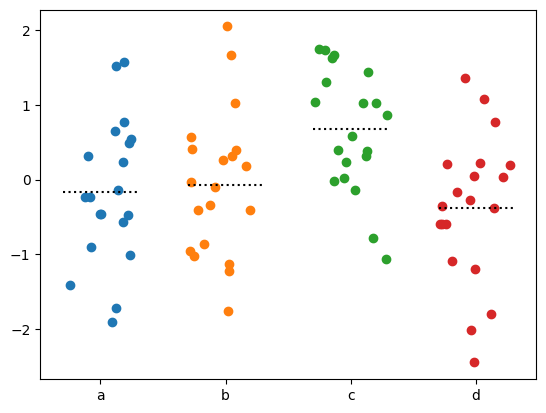

In [49]:
n = data_a.size
plt.scatter(x = [1] * n + rnd.uniform(-.3, .3, n), y = data_a);
plt.hlines(np.mean(data_a), 1 - .3, 1 + .3, linestyles='dotted', colors='black');

plt.scatter(x = [2] * n + rnd.uniform(-.3, .3, n), y = data_b);
plt.hlines(np.mean(data_b), 2 - .3, 2 + .3, linestyles='dotted', colors='black');

plt.scatter(x = [3] * n + rnd.uniform(-.3, .3, n), y = data_c);
plt.hlines(np.mean(data_c), 3 - .3, 3 + .3, linestyles='dotted', colors='black');

plt.scatter(x = [4] * n + rnd.uniform(-.3, .3, n), y = data_d);
plt.hlines(np.mean(data_d), 4 - .3, 4 + .3, linestyles='dotted', colors='black');

plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd']);

Of course, it's much easier when you can find a function that already makes a useful plot for you!  For this kind of task (comparing distributions of multiple data), **box plots** and **violin plots** are quite helpful:

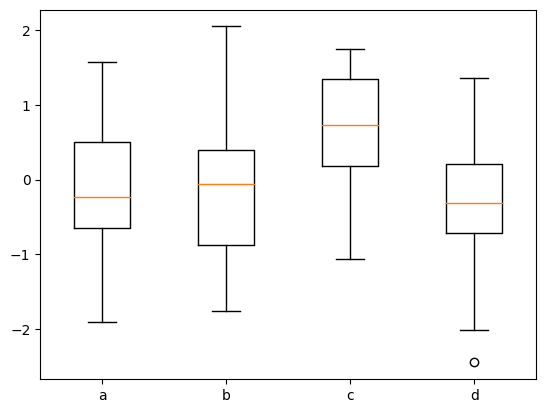

In [60]:
plt.boxplot([data_a, data_b, data_c, data_d], labels=['a', 'b', 'c', 'd']);

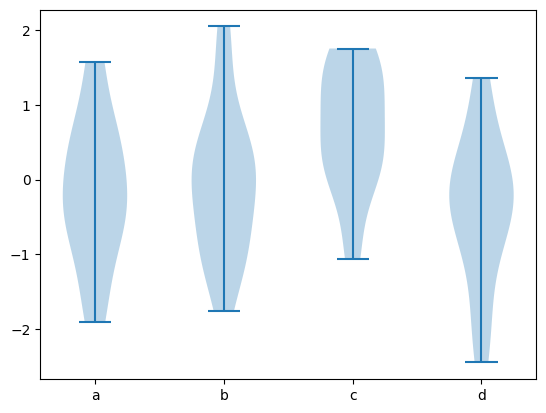

In [63]:
plt.violinplot([data_a, data_b, data_c, data_d])
plt.xticks([1, 2, 3, 4], ['a', 'b', 'c', 'd']);

**Discussion**: Which of the three plots above do you find most interesting?  What information do you get from each of them?

**A vs 0, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset A is generated from unlikely to be zero?

*Example*:

In [50]:
stats.ttest_1samp(data_a, 0)

Ttest_1sampResult(statistic=-0.797966433655592, pvalue=0.43475058842710046)

**B vs 1, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset B is generated from unlikely to be one?

In [51]:
stats.ttest_1samp(data_b, 1)

Ttest_1sampResult(statistic=-4.924581626018964, pvalue=9.410444261361524e-05)

**A vs B, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `B` is generated from?

In [52]:
stats.ttest_ind(data_a, data_b)

Ttest_indResult(statistic=-0.34548496872508355, pvalue=0.7316350980688235)

**A vs C, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `C` is generated from?

In [53]:
stats.ttest_ind(data_a, data_c)

Ttest_indResult(statistic=-2.990400096331035, pvalue=0.004868348606416014)

**A vs C, Paired Samples T-Test (a.k.a Relative Samples T-Test)**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `C`  unlikely to be 0?

In [54]:
stats.ttest_rel(data_a, data_c)

Ttest_relResult(statistic=-2.5719051374033515, pvalue=0.018669862069265977)

**A vs D, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `D`  unlikely to be 0?

In [55]:
stats.ttest_rel(data_a, data_c)

Ttest_relResult(statistic=-2.5719051374033515, pvalue=0.018669862069265977)